In [7]:
"""MNist dataset added with noise and some with zeros to ahow what
causes overfitting"""

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _= mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
[train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
[train_images, np.zeros((len(train_images), 784))], axis=1)

#training the model
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
train_images_with_noise_channels, train_labels,epochs=10,
batch_size=128,validation_split=0.2)

model = get_model()
history_zeros = model.fit(
train_images_with_zeros_channels, train_labels,epochs=10,
batch_size=128,validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6167 - accuracy: 0.8122 - val_loss: 0.3172 - val_accuracy: 0.9006
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2505 - accuracy: 0.9218 - val_loss: 0.2117 - val_accuracy: 0.9358
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1627 - accuracy: 0.9487 - val_loss: 0.1803 - val_accuracy: 0.9471
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1148 - accuracy: 0.9636 - val_loss: 0.1969 - val_accuracy: 0.9428
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0840 - accuracy: 0.9727 - val_loss: 0.1285 - val_accuracy: 0.9617
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.1597 - val_accuracy: 0.9548
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.1437 - val_accuracy: 0.9603
Epoch 

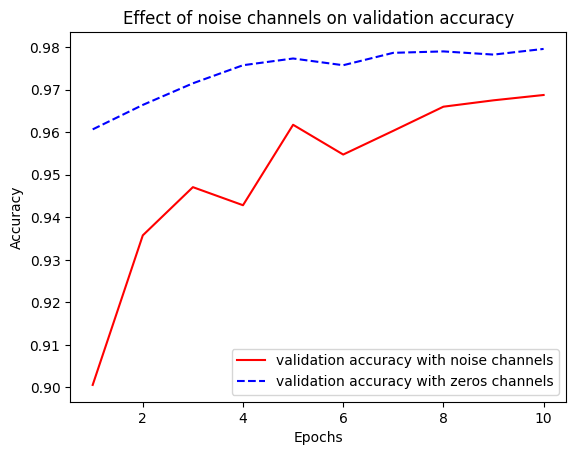

In [11]:
#plotting a validation accuracy comparison
import matplotlib.pyplot as plt
plt.clf()
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, "r-",
        label="validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()